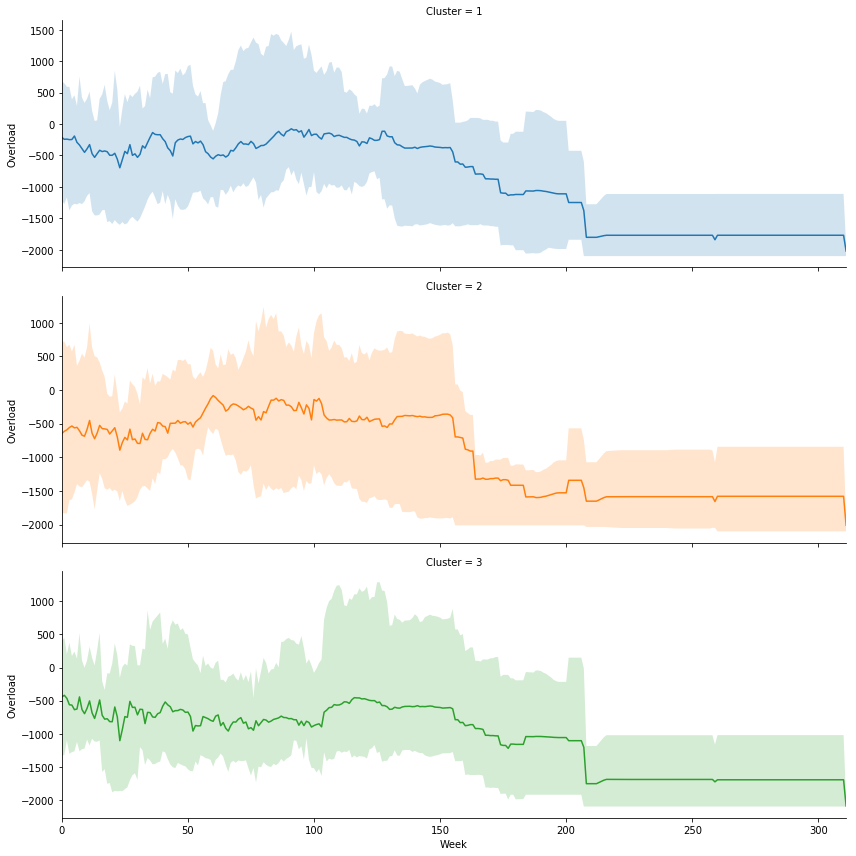

In [3]:
# Source: https://stackoverflow.com/questions/37767719/timeseries-plot-with-min-max-shading-using-seaborn
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn.timeseries

# Ignore Futurewarning messages
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

def _plot_range_band(*args, central_data=None, ci=None, data=None, **kwargs):
    upper = data.max(axis=0)
    lower = data.min(axis=0)
    #import pdb; pdb.set_trace()
    ci = np.asarray((lower, upper))
    kwargs.update({"central_data": central_data, "ci": ci, "data": data})
    seaborn.timeseries._plot_ci_band(*args, **kwargs)

seaborn.timeseries._plot_range_band = _plot_range_band

cluster_overload = pd.read_csv("datasets/TSplot.csv", delim_whitespace=True)
cluster_overload['subindex'] = cluster_overload.groupby(['Cluster','Week']).cumcount()

def customPlot(*args,**kwargs):
    df = kwargs.pop('data')
    pivoted = df.pivot(index='subindex', columns='Week', values='Overload')
    ax = sns.tsplot(pivoted.values, err_style="range_band", n_boot=0, color=kwargs['color'])

g = sns.FacetGrid(cluster_overload, row="Cluster", sharey=False, hue='Cluster', aspect=3, size=4)
g = g.map_dataframe(customPlot, 'Week', 'Overload','subindex')



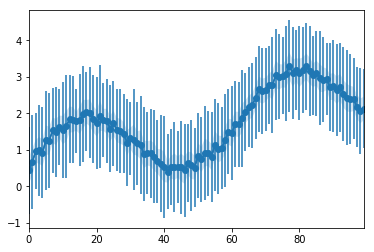

In [4]:
# Source: https://stackoverflow.com/questions/34293687/standard-deviation-and-errors-bars-in-seaborn-tsplot-function-in-python
import numpy as np;
import seaborn as sns;
import pandas as pd
import matplotlib.pyplot as plt

# create a group of time series
num_samples = 100
group_size = 10
x = np.linspace(0, 10, num_samples)
group = np.sin(x) + np.linspace(0, 2, num_samples) + np.random.rand(group_size, num_samples) + np.random.randn(group_size, 1)
df = pd.DataFrame(group.T, index=range(0,num_samples))

# plot time series with seaborn
ax = sns.tsplot(data=df.T.values) #, err_style="unit_traces")

# Add std deviation bars to the previous plot
mean = df.mean(axis=1)
std  = df.std(axis=1)
ax.errorbar(df.index, mean, yerr=std, fmt='-o') #fmt=None to plot bars only)
plt.show()